# Newton's Method - Illustrative Examples

This code illustrate Newton's method for various functions defined below. In particular, it contains a few examples which show the importance of every hypothesis in the theoretical quadratic convergence result.

In [42]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
import time

v = 1      # variant corresponding to the number of the function below
Niter = 10 # Number of iterations
x0 = -1 # Initialization
a = -2.5   # Lower bound for the plot interval
b = 2.5    # Upper bound for the plot interval

## Various objective functions

Here we consider multiple functions to be tested with Newton's method

Case 0: $f(x) = x^2$ (quadratic function, convergence in $1$ iteration)

Case 1: $f(x) = x^6/6-x^2/2+x$ (here the choice of the initialization is important)

Case 2: $f(x) = x^2-\sin x$ 

Case 3: $f(x) = x^2+\exp x$

Case 4: $f(x) = x^4$ (this does not verify the non-degeneracy hypothesis: quadratic convergence is not attained)

Case 5: $f(x) = \sqrt{1+x^2}$ (here the choice of initialization is important: for $|x|<1$ we have cubic convergence, while for $|x|\geq 1$ the algorithm diverges)

In [43]:
def fun(x,v):                   # function definition
    if v==0:
        return x**2
    if v==1:
        return x**6/6-x**2/2+x
    if v==2:
        return x**2-np.sin(x)
    if v==3:
        return x**2+np.exp(x)
    if v==4:
        return x**4
    if v==5:
        return np.sqrt(1+x**2)
def der(x,v):                   # first derivative
    if v==0:
        return 2*x
    if v==1:
        return x**5-x+1
    if v==2:
        return 2*x-np.cos(x)
    if v==3: 
        return 2*x+np.exp(x)
    if v==4:
        return 4*x**3
    if v==5:
        return x/np.sqrt(1+x**2)
def der2(x,v):                  # second derivative
    if v==0: 
        return 2
    if v==1:
        return 5*x**4-1
    if v==2: 
        return 2+np.sin(x)
    if v==3:
        return 2+np.exp(x)
    if v==4:
        return 12*x**2
    if v==5:
        return 1/np.sqrt(1+x**2)**3

# List of optimizers for the above functions
if v==0:
    analytic = 0
if v==1:
    analytic = -1.1673039782614187
if v==2:
    analytic = 0.45018361129487355
if v==3:
    analytic = -0.35173371124919584
if v==4:
    analytic = 0
if v==5:
    analytic = 0

## Algorithm: Newton method in dimension one

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">
 **Initialization:** Choose the starting point $x_0$

 **Step $i$:** 
   - Compute $f(x_{i-1}),f'(x_{i-1}),f''(x_{i-1})$ and approximate $f$ around $x_{i-1}$ by its second-order taylor expansion
$$ p(x) = f(x_{i-1})+f'(x_{i-1})(x-x_i)+\frac{1}{2} f''(x_{i-1})(x-x_{i-1})^2.$$
   - choose $x_i$ as the minimizer of the quadratic function $p$:
    $$ x_i = x_{i-1} - \frac{f'(x_{i-1})}{f''(x_{i-1})}.$$
   - replace $i$ with $i+1$ and loop
</div>

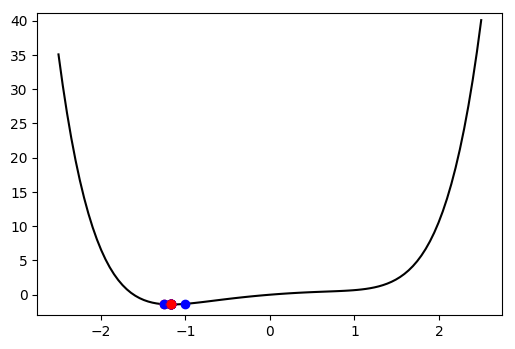

In [44]:
uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
dnlim = -3
t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
plt.figure(1)
plt.ylim([dnlim,uplim])            # Set upper bounds for the figure

plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]
vals  = np.array([x0]);            # Create an array which holds the optimization history


for i in range(0,Niter):
 # Define the Newton interpolating polynomial: see the course   
 def interp(x):
    return fun(x0,v)+der(x0,v)*(x-x0)+0.5*der2(x0,v)*(x-x0)**2

 plt.plot(x0,fun(x0,v),'bo')
 #plt.plot(t1,interp(t1),'r')        # Uncomment this if you want to see the interpolating function

 newx = x0-der(x0,v)/der2(x0,v)      # Compute the next point
 plt.plot(newx,fun(newx,v),'ro')     # Plot the next point
 #plt.rc("savefig", dpi=300)         # Uncomment if you want to save a picture
 x0 = newx                 
 actval = np.array([x0])             
 vals = np.append(vals,actval)       # Update the list of values

After the optimization loop, the convergence history and the order of convergence is computed. For each one of the functions a value $x^*$ close to the analytical solution is provided. The order of convergence is obtained by plotting the ratio of two consecutive errors $\displaystyle\frac{|x_{n+1}-x^*|}{|x_n-x^*|}$ is plotted in log-log scale.

Solution Found: -1.1673039782614187
History:
0   -1.0
1   -1.25
2   -1.1784593935169048
3   -1.16753738939611
4   -1.1673040828230083
5   -1.1673039782614396
6   -1.1673039782614187
7   -1.1673039782614187
8   -1.1673039782614187
9   -1.1673039782614187
10   -1.1673039782614187


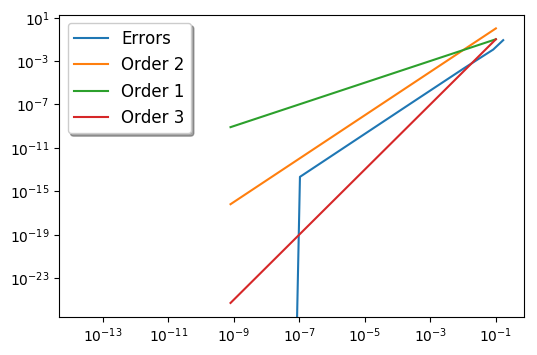

In [45]:
print("Solution Found:",x0)          # Print the solution
print("History:")                    # Print the values of the function throughout the optimization
for i in range(0,vals.size):
    print(i," ",vals[i])

dis = np.linspace(1,Niter,Niter+1)   # Error analysis     
errors = abs(vals-analytic)          # Compute differences between current points and the optimum
if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2                      # Construct curve of order 1
sq2 = 100*sq**2                      # Construct curve of order 2
sq3 = 100*sq**3                      # Construct curve of order 3


plt.figure(2)
plt.loglog(errors[:-1:],errors[1:],label='Errors')  # Plot the errors in log-log plot
plt.loglog(sq,sq2,label='Order 2')                  # Plot order curves for comparison
plt.loglog(sq,sq,label='Order 1')
plt.loglog(sq,sq3,label='Order 3')
plt.legend(loc='best', shadow=True, fontsize='large')  # Show legend
plt.show()                                          # Show plot